## RESOLUCIONES GUIA 1

Resolucion de los ejercios de la guia 1 probabilidades discretas ade la materia Analisis Estadistico de la UNSAM. En el inicio eran las librerias y funciones que se desarrollaron a lo largo de la materia para, luego, ir generando una coleccion de scripts que simplifique tareas posteriores. 

In [489]:
from IPython.display import Image


import numpy as np 
import matplotlib.pyplot as plt

from scipy.special import factorial


In [485]:
def esperanza_var_mas_constante(X, a):
    return np.mean(X + a) 

def esperanza_var_por_constante(X, a):
    return np.mean(a * X)

def esperanza_var_menos_esperanza(X):
    mu = np.mean(X)
    return np.mean(X - mu)

def esperanza_var_por_esperanza(X):
    mu = np.mean(X)
    return np.mean(mu * X)

def binomial(N, k, p):
    c = factorial(N)/(factorial(k) * factorial(N-k))
    return c * p**k * (1-p)**(N-k)

def poisson(mu, k):
    return np.exp(mu) * np.power(mu, k)/factorial(k)

def dado(n=1):
    """
    n = Numero de dados
    """
    return np.random.randint(1, 7, n)


def dardo(n=1):
    """
    n = dardo lanzados N veces
    """
    return 170 * np.random.rand(n)

## Ejercicio 1

Dada la variable aleatoria $X$ y la constante a, calcular los siguientes valores enterminos de $μ = E(X)$
- $E(X + a)$
  
- $E(aX)$
  
- $E(X - \mu)$
  
- $E(\mu X)$

In [53]:
low = 0
high = 100
size = 10000

a = 22

X = np.random.randint(low=low, high=high, size=size)

In [54]:
E1 = []
E2 = []
E3 = []
E4 = []
E0 = []
for i in range(size):
    X = np.random.randint(low=low, high=high, size=size)
    E0.append(np.mean(X))
    E1.append(esperanza_var_mas_constante(X, a))
    E2.append(esperanza_var_por_constante(X, a))
    E3.append(esperanza_var_menos_esperanza(X))
    E4.append(esperanza_var_por_esperanza(X))

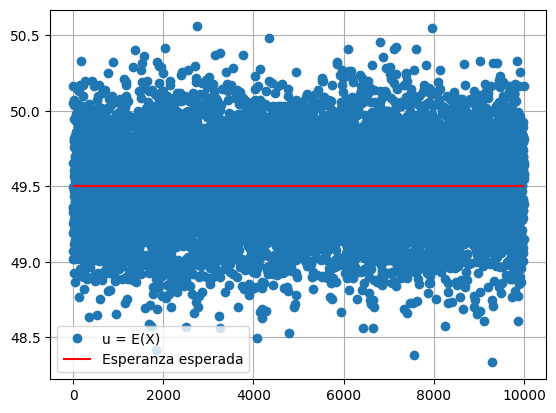

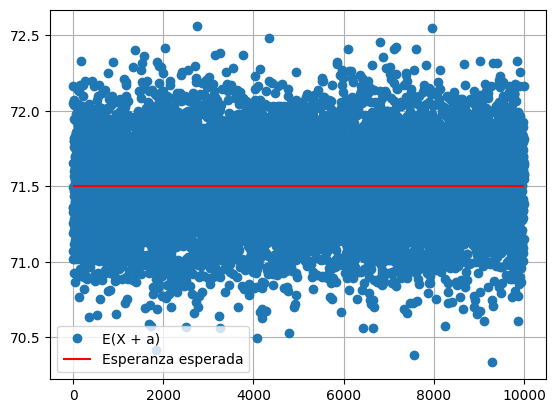

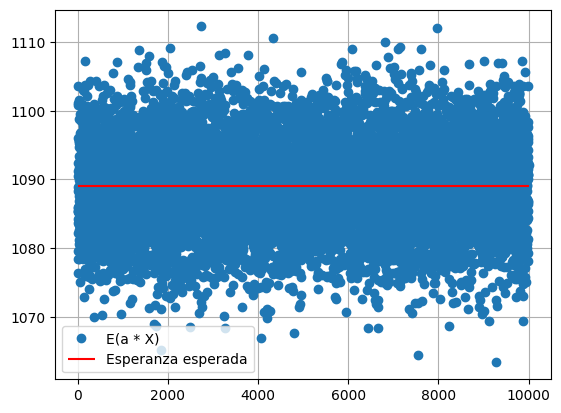

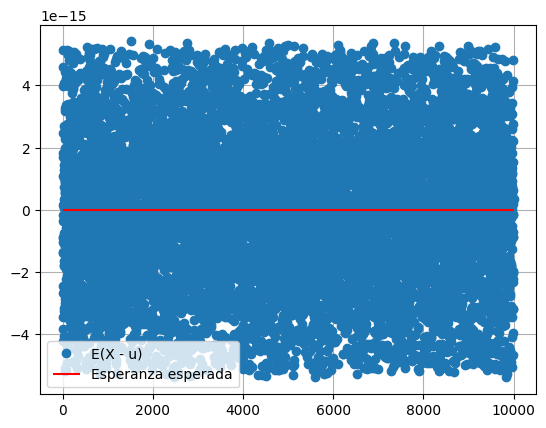

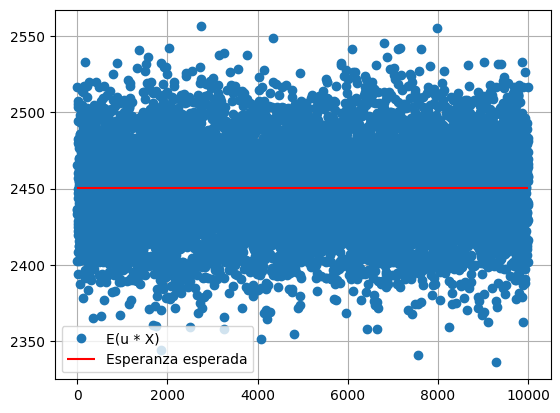

In [69]:
plt.plot(E0, "o", label="u = E(X)")
plt.hlines(49.5, 0, 10000, color="red", label="Esperanza esperada")

plt.legend()
plt.grid()
plt.show()

plt.plot(E1, "o", label="E(X + a)")
plt.hlines(49.5 + a, 0, 10000, color="red", label="Esperanza esperada")

plt.legend()
#plt.hlines(
plt.grid()
plt.show()


plt.plot(E2, "o", label="E(a * X)")
plt.hlines(49.5 * a, 0, 10000, color="red", label="Esperanza esperada")

plt.legend()
plt.grid()
plt.show()


plt.plot(E3, "o", label="E(X - u)")
plt.hlines(0, 0, 10000, color="red", label="Esperanza esperada")

plt.legend()
plt.grid()
plt.show()


plt.plot(E4, "o", label="E(u * X)")
plt.hlines(49.5 **2, 0, 10000, color="red", label="Esperanza esperada")
plt.grid()
plt.legend()
plt.show()

## Ejercicio 2 
Dada la variable aleatoria X y la constante a, demostrar las siguientes identidades:

a) $Var(X + a) = Var(X)$  
b) $Var(a X) = a^2 Var(X)$  
c) $Var(X) = E(X^2) − E(X)^2$  

primero vamos a resolverlo _empiricamente_ y luego formalmente

In [77]:
low = 0
high = 100
size = 10

a = 22

X = np.random.randint(low=low, high=high, size=size)

In [91]:
var = lambda x: np.std(x)**2

In [92]:
var(X + a) == var(X)

True

#### Demostracion (a)

La varianzaa se define como: 

$var(X) = E[ (X - E(X))^2]$

Llamando $Y = X + a$,  

$var(Y) = E[(Y - E(Y))^2]$  

$var(X + a) = E[ (X + a - E(X + a))**2]$

Sabiendo que $E(X + a) = E(X) + a$, entonces

$var(X + a) = E[(X + a - (E(X) + a))**2]$

por lo tanto,  

$var(X + a) = E[(X - E(X))^2]$ 

$ var(X + a) = var(X)$

que es lo que queriamos ver.


In [96]:
print(var(a * X) == var(X) * (a**2))
print(var(a * X) - var(X) * (a**2))

False
-5.820766091346741e-11


Se puede ver que es practicamente cero y la diferencia se da por conflictos de redondeo computacional y no por la igualdad perse.

#### Demostracion (b)

La varianzaa se define como: 

$var(X) = E[ (X - E(X))^2]$

Llamando $Y = X * $,  

$var(Y) = E[(Y - E(Y))^2]$  
$var(X * a) = E[ (X * a - E(X * a))^2]$

Sabiendo que $E(X * a) = E(X) * a$, entonces

$var(X * a) = E[(X * a -  E(X) *a )^2]$

$var(X * a) = E[ a^2 (X - E(X))^2]$

por lo tanto,  

$var(X * a) = a^2 E[(X - E(X))^2]$ 

$var(X * a) = a^2 var(X)$  

que es lo que queriamos ver.

In [102]:
print(var(X) == np.mean(X**2) - np.mean(X)**2)
print(var(X) - np.mean(X**2) - np.mean(X)**2)

False
-5703.120000000001


Analogamente al caso anterior, se puede que la igualdad es efectica salvo por conflictos de redondeo

#### Propiedad

$Var(X) = E(X^2) − E(X)^2$  


#### Demostracion (c)
La varianzaa se define como: 

$var(X) = E[ (X - E(X))^2]$

$var(X) = E(X^2 - 2  X  E(X) + E(X)^2)$

$ var(X) = E[X^2] - E[ 2 X E(X)] + E[E(X)^2] $ 

$ var(X) = E[X^2] -  2E(X) E(X) + E(X)^2$

$ var(X) = E[X^2] - E[X]^2$

qye es lo que queriamos ver. 


## Ejercicio 3 

Dadas las variables independientes X e Y , mostrar que:
-  $E(X + Y ) = E(X) + E(Y )$

-  $Var(X + Y ) = Var(X) + Var(Y )$

### Propiedad
 $E(X + Y ) = E(X) + E(Y )$

#### Demostracion

Recordando, la esperanza de la variable aleatoria $X$ se define como:

$E(X) = \sum x P(X=x)$

Donde $P(X=x)$ es la probabilidad de que $X$ tenga valor $x$. 

Entonces,

$E(X + Y) =  \sum_{x,y} (x+y) P(X+Y=x+y)$ 

Como $X$ e $Y$ son variables aleatorias independientes puedo reescribir $P(X + Y = x +y) $ como $P(X=x, Y=y)$, entonces

$ E(X + Y) = \sum_{x, y} (x+y) P(X=x, Y=y) $

$ E(X + Y) \sum_{x, y} x P(X=x, Y=y) + \sum$_{x, y} y P(X=x, Y=y)$

$ E(X + Y) \sum_{x, y} x P(X=x) P(Y=y) + \sum$_{x, y} y P(X=x) P(Y=y)$

$ E(X+Y) = \sum_x x P(X=x) \sum_y P(Y=y) + \sum_y y P(Y=y) \sum_x P(X=x)$


Por definicion de la funcion probabilidad $\sum_k P(K=k)=1$, etnonces

$ E(X + Y) = \sum_x x P(X=x) + \sum_y y P(Y=y)$

$E(X + Y) = E(X) + E(Y)$


qqv.



### Propiedad

 $Var(X + Y ) = Var(X) + Var(Y )$

#### Demostracion

$Var(X + Y) = E(X + Y)^2 - E( (X+Y)^2) $

Var(X + y) = (E(X) + E(Y))^2 - E(X^2 + 2XY + Y^2]$

$Var(X+Y) = E(X)^2 + 2 E(X) E(Y) + E(Y)^2 - E(X^2) - E(2XY) - E(Y^2) $

$Var(X+Y) = E(X)^2 - E(X^2) + E(Y)^2 - E(Y^2) + 2 E(X) E(Y) - 2 E(X Y) $

$Var(X+Y) = Var(X) + Var(y) + 2(E(X)E(Y) - E(XY))$

Falta entonces ver que $E(X) E(Y) = E(XY)$, 

$E(XY) = sum_{x,y} x y P(XY==xy)$

como $X$ y $Y$ son independientes, 

$E(XY) = sum_x x P(X=x) sum_y y P(Y=y)$

$E(XY) = E(X) E(Y)$

por lo tanto,

$Var(X+Y) = Var(X) + Var(y) + 2(E(X)E(Y)$

qqv.

## Ejercicio 4

Mostrar que la distribucion binomial esta normalizada a la unidad sumando todos los terminos de la funcion de distribucion de probabilidad

La funcion probabilidad de la binomial viene dada por: 


$ B_p(n,k) = \dfrac{n!}{k!(n - k)!} p^k (1-p)^{n-k}  $

donde **n** es la cantidad de pruebas, **k** el numero de casos positivos y _p_ la probabilidad de que que un caso sea positivo. 


Queremos ver que 
$\sum_{k=0}^n B_p(n,k) = 1 $

$(n!)(1-p)^n \sum_k^n \frac{1}{k! (n-k)!} (\frac{p}{1-p})^k$





Si $k=0$, 

$ (1 - p)^n

Si $k=n$ 

$ p^n$ 

### Ejercicio 5

El test serologico de la covid-19. Los tests serologicos detectan la presencia de anticuerpos en la sangre. Este articulo muestra una comparacion de la sensitividad
y especifidad de diez tipos de tests diferentes. Los investigadores encontraron que, como referencia, los tests son 90% sensitivos y 95% especıficos. Suponiendo que
solo el 10% de la poblaci´on tiene anticuerpos covid-19, calcular la probabilidad que una persona con un test positivo efectivamente tenga anticuerpos.

#### Breve repaso 

Para resolver el ejercicio primero recordemos las definiciones de **sensitivos** y **especificios**,  la _sensibilidad_ de un test viene dada por el ratio entre los casos detectados positivos y el total de casos positivos. Es decir: 


$Sensibilidad = \frac{VP}{VP + FN}$

donde $VP$=_verdaderos positivos_ y $FN$=_falsos negativos_, donde la suma de ambos es el total de casos positivos reales.  Mientras que la _especificidad_ viene dada por la probabilidad de que un sujeto sano tenga un resultado negativo de prueba (es decir, si no esta enfermo que detecte que correctamente que no esta enfermo), esto viene dado por el ratio: 

$especificidad = \frac{VN}{VN + FP}$

donde $VN$=_verdaderos negativos_ (gente no enfernma y que el test dio negativo) y $FP$=_Falsos Positivos_ (Gente no enferma y que el test dio positivo), la suma de ambos es la cantidad de sujetos sanos. 


#### Resolucion

Sabemos que los test son $90%$ sensitivos y $95$ especificos, sabemos que el $10$ de la poblacion tiene anticuerpos. 

$N_T$= Total de la poblacion 

$N_a$ = Poblacion con anticuerpos 

Sabemos que $P_a = \frac{N_a}{N_T} = 0.1%$, $S = \frac{VP}{N_a} = 0.9 = P(tp|se)$ y $E = \frac{VN}{N_T - T_a} =0.95 = P(tn|sne)$


Queremos saber _dado un test positivo sea verdaderamente positivo_, es decir: 

$P(se|tp) = ? $

El teorema de bayes nos dice: 

$P(A_i|B) = \frac {P(B|A_i) P(A_i)}{P(B)}$


Para nuestro caso: 

$P(se|tp) = \frac{P(tp|se) P(se)}{p(se) P(tp|se) + P(sne) P(tp|sne)}$


$P(se|tp) = \frac{P(tp|se) P(se)}{p(se) P(tp|se) + P(sne)(1 - P(tn|sne))}$

$P(se|tp) = \frac{ 0.9 x 0.1}{0.9x0.1 + 0.9 (1 - 0.95)} = \frac{0.09}{0.09 + 0.9 x 0.05} = 0.67$

### Ejercicio 6

**Ayuda a Fermat**. La solucion de Fermat al problema de la division justa de la
bolsa es impractica cuando quedan muchas rondas por jugar ya que implica contar
todas las partidas que dan por ganador a uno de los dos jugadores. Afortunada-
mente con simulaciones Monte Carlo es posible encontrar una soluci´on aproximada.
Supongamos que un juego de 51 rondas es interrumpido en la ronda 25 y que Fer-
mat gan´o 15 rondas y Pascal 10. Simular el resto de las rondas para decidir cu´al
jugador gana la partida. Repetir este procedimiento 1000 veces para encontrar la
divisi´on justa de la bolsa

Si uno estima la probabilidad, sabemos que Fermat gano 15 partidas, es decir, necesita ganar 11 partidas mas para declararse vencedor. Sabemos que se juegan al menos 26 partidas mas, de esas 26 partidas Fermat necesita ganar al menos 11. Asumiendo que se juegan SI o SI las 26 rondas restantes, la probabilidad de que gane Fermat viene dada por: 

$P_f = \sum_{k=11}^{N} \frac{N!}{k! (N-k)!} p^k (1-p)^{(N -k)}$

In [293]:
PT = 51 
PI = 25
FG = 15 
PG = 10
p = 0.5
PNG = 26 

PF = PT - PI
N = 100000

In [294]:
Pf = 0
for k in range(PNG - FG, PF + 1):
    Pf +=binomial(PF, k, p)

Entonces, $P_f= 0.836$ es el resultado esperado.

In [295]:
resultados  = []
for n in range(N):
    fg = FG
    pg = PG
    for i in range(PF):
        if np.random.rand() > 0.5:
            fg += 1
        else: 
            pg += 1
    if fg > pg: 
        resultados.append(1)
    else: 
        resultados.append(0)

In [296]:
p_f = np.sum(resultados)/N
p_p = 1 - np.sum(resultados)/N

In [298]:
round(p_f, 3) 

0.836

### Ejercicio 7

**El numero de la suerte**. Simular el lanzamiento de cinco dados y contar cuantas
veces sale el numero tres. Repetir la operacion 1000 veces y construir un his-
tograma de frecuencia con el numero de ocurrencias del numero tres. Comparar
los datos simulados con una funcion de distribuci´on binomial con parametros n y
p adecuados.

In [411]:
N = 1000
v = 3

In [412]:
results = []
for i in range(N):
    r = dado(5)
    results.append(r[r == v].shape[0])

bins, high = np.unique(results, return_counts=True)
y = [binomial(5, k, 1/6) for k in range(6)]
x = [0, 1, 2, 3, 4, 5]

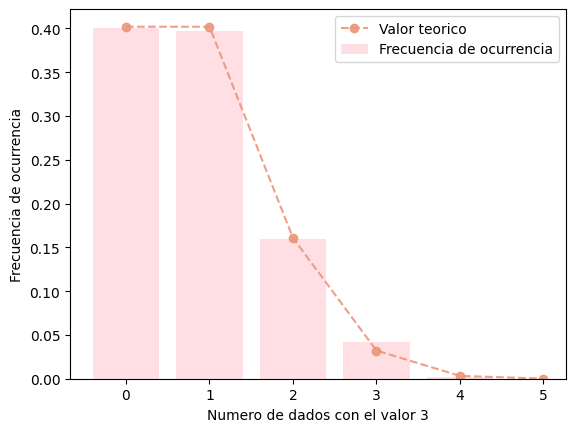

In [413]:
plt.bar(bins, high/sum(high), alpha=0.5, color="pink", label="Frecuencia de ocurrencia")
plt.plot(x, y, "o--", color="darksalmon", alpha=0.9, label="Valor teorico" )
#plt.grid()
plt.legend()
plt.ylabel("Frecuencia de ocurrencia")
plt.xlabel("Numero de dados con el valor 3")
plt.show()


### Ejercicio 8: 

**El jugador de dardos torpe**. Simular el lanzamiento de dardos considerando
que el blanco interno de una diana estandar tiene un radio de 12.7 mm, el blanco
externo de 31.8 mm, el anillo triple de 107 mm y el anillo doble de 170 mm como
muestra la figura 1. 


![dardo](dardo.png)



Un jugador torpe lanza dardos al azar dentro del anillo doble de la diana. Calcular la probabilidad que un tiro individual de en el blanco exterior.
Simular una corrida de 100 lanzamientos y contar cuantos dardos dan en el blancoexterior. Simular 1000 tandas de 100 lanzamientos y construir un histograma de
frecuencia. Comparar con una distribucion de Poisson.


In [481]:
R = 170
R_blanco_interno = 12.7 
R_blanco_externo = 31.8
R_anillo_triple = 107 
R_anillo_doble = 170

In [482]:
N = 100000

results = []
for i in range(N):
    radio = dardo(100)
    cond_bi = radio <= R_blanco_interno
    cond_be = (radio > R_blanco_interno) & (radio <= R_blanco_externo)
    cond_at = (radio > R_blanco_externo) & (radio <= R_anillo_triple)
    cond_ad = (radio > R_anillo_triple) & (radio <= R_anillo_doble)
    results.append(sum(cond_be))

bins, high = np.unique(results, return_counts=True)

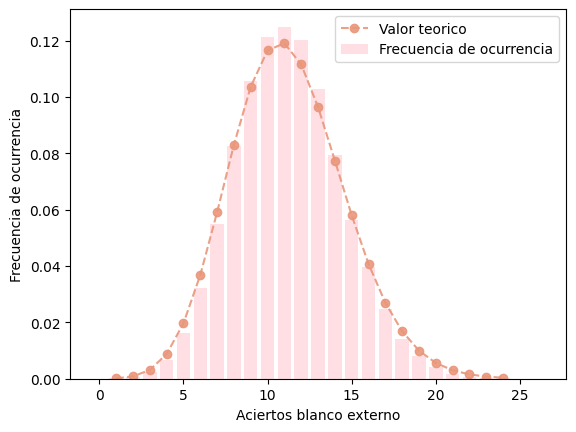

In [488]:
plt.bar(bins, high/sum(high), alpha=0.5, color="pink", label="Frecuencia de ocurrencia")

plt.ylabel("Frecuencia de ocurrencia")
plt.xlabel("Aciertos blanco externo")

t = np.arange(1, 25, 1)
d = poisson(np.mean(results), t)
plt.plot(t, d/sum(d),  "o--", color="darksalmon", alpha=0.9, label="Valor teorico" )

plt.legend()
plt.show()